<a href="https://colab.research.google.com/github/HowardHNguyen/Data_Science_for_Marketing_Solutions/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customer segmentation is the backbone of successful targeted marketing, with which you can target specific groups of customers with different pricing options, promotions, and product placements that capture the interests of the target audience in the most cost-effective way.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# from google.colab import files
# files.upload()

In [4]:
!ls

drive  sample_data


In [5]:
df = pd.read_excel('/content/drive/MyDrive/online_retail_uci.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [7]:
# Data cleanup
# negative quantity
df.loc[df['Quantity'] <= 0].shape

(10624, 8)

In [8]:
df.shape

(541909, 8)

In [9]:
df = df.loc[df['Quantity'] > 0]
df.shape

(531285, 8)

In [10]:
df.info

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Cust

In [11]:
# Missing Customer ID

In [12]:
pd.isnull(df['CustomerID']).sum()

133361

In [13]:
df.shape

(531285, 8)

In [14]:
# Dropping records with no CustomerID

In [15]:
df = df[pd.notnull(df['CustomerID'])]

In [16]:
df.shape

(397924, 8)

In [17]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [18]:
print('Date Range: %s ~ %s' % (df['InvoiceDate'].min(), df['InvoiceDate'].max()))

Date Range: 2010-12-01 08:26:00 ~ 2011-12-09 12:50:00


In [19]:
# Excluding an Incomplete Month

In [20]:
df.loc[df['InvoiceDate'] >= '2011-12-01'].shape

(17304, 8)

In [21]:
df.shape

(397924, 8)

In [22]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [23]:
df.shape

(380620, 8)

In [24]:
# Computing total sales from the Quantity and UnitPrice columns: For our analyses,
# we need the total sales value, so we are going to multiply the two Quantity and UnitPrice columns

In [25]:
# append a new column 'Sales' to the df
df['Sales'] = df['Quantity'] * df['UnitPrice']

<ipython-input-25-ad258be9536b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'] = df['Quantity'] * df['UnitPrice']


In [26]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [27]:
# Per-customer data: In order to analyze customer segments, we need to transform
# our data, so that each record represents the purchase history of individual customers.

In [28]:
customer_df = df.groupby('CustomerID').agg({
    'Sales': sum,
    'InvoiceNo': lambda x: x.nunique()
})

customer_df.columns = ['TotalSales', 'OrderCount']
customer_df['AvgOrderValue'] = customer_df['TotalSales']/customer_df['OrderCount']

In [29]:
# we are grouping the DataFrame, df, by CustomerID and computing the total sales and
# the number of orders for each customer. Then, we also calculate the average per-order
# value, AvgOrderValue, by dividing the TotalSales column by the OrderCount column.

In [30]:
customer_df.head(15)

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,77183.60,1,77183.600000
12347.0,4085.18,6,680.863333
12348.0,1797.24,4,449.310000
12349.0,1757.55,1,1757.550000
12350.0,334.40,1,334.400000
12352.0,2506.04,8,313.255000
12353.0,89.00,1,89.000000
12354.0,1079.40,1,1079.400000
12355.0,459.40,1,459.400000


In [31]:
customer_df.describe()

,TotalSales,OrderCount,AvgOrderValue
count,4298.000000,4298.000000,4298.000000
mean,1952.818779,4.131689,400.255621
std,8354.913254,7.420253,1271.187289
min,0.000000,1.000000,0.000000
25%,304.305000,1.000000,178.602500
50%,657.265000,2.000000,295.033958
75%,1599.515000,4.000000,431.594250
max,268478.000000,201.000000,77183.600000


Now, as you can see from this data, the three columns, TotalSales, OrderCount, and AvgOrderValue, have different scales. TotalSales can take any values from 0 to 26,848, while OrderCount takes values between 1 and 201. Clustering algorithms are highly affected by the scales of the data, so we need to normalize this data to be on the same scale. We are going to take two steps to normalize this data. First, we are going to rank the data, so that the values of each column range from 1 to 4298, which is the total number of records.

In [32]:
rank_df = customer_df.rank(method='first')

In [33]:
rank_df.head(10)

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,4290.0,1.0,4298.0
12347.0,3958.0,3470.0,3888.0
12348.0,3350.0,2861.0,3303.0
12349.0,3321.0,2.0,4238.0
12350.0,1241.0,3.0,2561.0
12352.0,3630.0,3774.0,2360.0
12353.0,119.0,4.0,201.0
12354.0,2781.0,5.0,4151.0
12355.0,1670.0,6.0,3354.0


In [34]:
rank_df.describe()

,TotalSales,OrderCount,AvgOrderValue
count,4298.000000,4298.000000,4298.000000
mean,2149.500000,2149.500000,2149.500000
std,1240.870058,1240.870058,1240.870058
min,1.000000,1.000000,1.000000
25%,1075.250000,1075.250000,1075.250000
50%,2149.500000,2149.500000,2149.500000
75%,3223.750000,3223.750000,3223.750000
max,4298.000000,4298.000000,4298.000000


Next, we are going to normalize this data to center around the mean and have a mean of 0 and a standard deviation of 1.

In [35]:
normalized_df = (rank_df - rank_df.mean()) / rank_df.std()

In [36]:
normalized_df.head(10)

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,1.724999,-1.731446,1.731446
12347.0,1.457445,1.064173,1.401033
12348.0,0.967466,0.573388,0.929590
12349.0,0.944096,-1.730641,1.683093
12350.0,-0.732148,-1.729835,0.331622
12352.0,1.193114,1.309162,0.169639
12353.0,-1.636352,-1.729029,-1.570269
12354.0,0.508917,-1.728223,1.612981
12355.0,-0.386422,-1.727417,0.970690


In [37]:
normalized_df.describe()

,TotalSales,OrderCount,AvgOrderValue
count,4298.000000,4298.000000,4.298000e+03
mean,0.000000,0.000000,-6.612776e-18
std,1.000000,1.000000,1.000000e+00
min,-1.731446,-1.731446,-1.731446e+00
25%,-0.865723,-0.865723,-8.657232e-01
50%,0.000000,0.000000,0.000000e+00
75%,0.865723,0.865723,8.657232e-01
max,1.731446,1.731446,1.731446e+00


In [38]:
# Customer Segmentation via K-Means Clustering
from sklearn.cluster import KMeans

# **K-Means Clustering**

The k-means clustering algorithm is a frequently used algorithm for drawing insights into the formations and separations within data. In marketing, it is often used to build customer segments and understand the behaviors of these different segments.

In [39]:
kmeans = KMeans(n_clusters=4).fit(normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [40]:
kmeans

KMeans(n_clusters=4)

In [41]:
kmeans.labels_

array([3, 0, 0, ..., 1, 2, 0], dtype=int32)

In [42]:
kmeans.cluster_centers_

array([[ 1.20623767,  1.00587146,  0.86737285],
       [-1.24710672, -0.79832009, -1.0614356 ],
       [ 0.21602395,  0.71335285, -0.6427677 ],
       [-0.13271459, -0.85015948,  0.79867829]])

Now that we have built our first clustering model, let's visualize this data.

In [43]:
four_cluster_df = normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']].copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_

In [44]:
four_cluster_df.head()

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12346.0,1.724999,-1.731446,1.731446,3
12347.0,1.457445,1.064173,1.401033,0
12348.0,0.967466,0.573388,0.929590,0
12349.0,0.944096,-1.730641,1.683093,3
12350.0,-0.732148,-1.729835,0.331622,3


In [45]:
four_cluster_df.groupby('Cluster').count()['TotalSales']

Cluster
0    1132
1    1149
2     954
3    1063
Name: TotalSales, dtype: int64

We store the cluster label information for each record into a newly created DataFrame, four_cluster_df. With this DataFrame, we can visualize the clusters, using the following code:

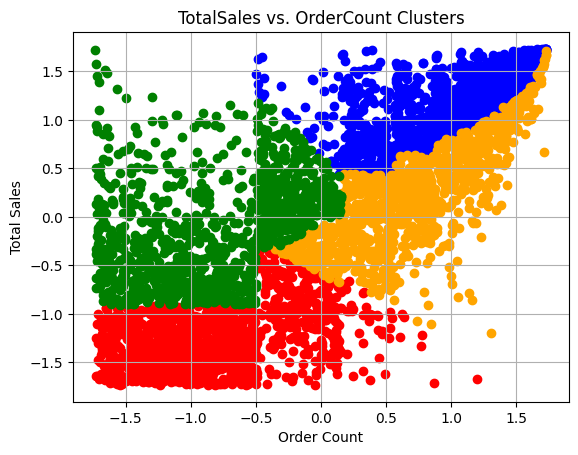

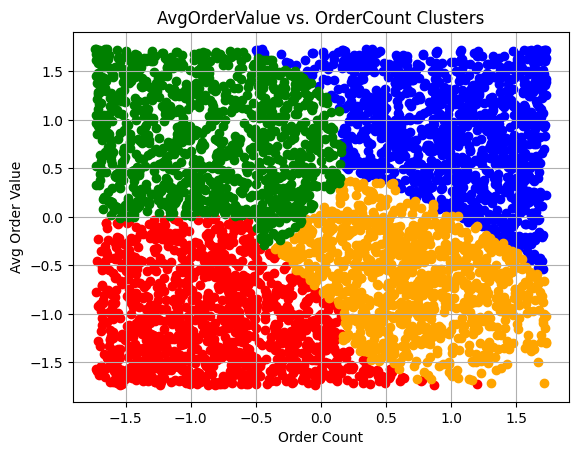

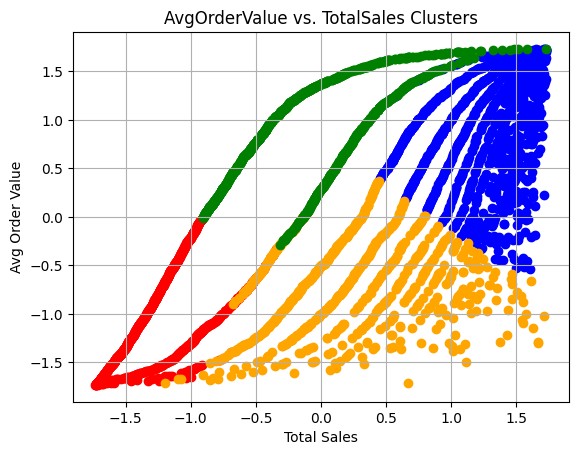

In [46]:
plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'],
    c='green'
)

plt.title('TotalSales vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Total Sales')

plt.grid()
plt.show()


plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='green'
)

plt.title('AvgOrderValue vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Avg Order Value')

plt.grid()
plt.show()


plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='green'
)

plt.title('AvgOrderValue vs. TotalSales Clusters')
plt.xlabel('Total Sales')
plt.ylabel('Avg Order Value')

plt.grid()
plt.show()

Let's take a closer look at this plot. The cluster in blue is the group of low-value customers, who have not purchased our products so much. On the other hand, the cluster in red is the group of high-value customers, who have purchased the greatest amount and who have purchased products frequently. We can also visualize the clusters with different angles, using the rest of the variables.

The first plot shows the clusters visualized based on AvgOrderValue and OrderCount. On the other hand, the second plot shows the clusters visualized based on AvgOrderValue and TotalSales. As you can see from these plots, the cluster in blue has the lowest average per-order value and the lowest number of orders. However, the cluster in red has the highest average per-order value and the greatest number of orders. Visualizing clusters helps you understand the characteristics of different clusters much more easily and clearly.

# Selecting the best number of clusters
Often, we do not know what the best number of clusters to use is when building k-means clustering models. As discussed in an earlier, we can use the silhouette coefficient to determine what the best number of clusters is to split the data. In the scikit-learn package, you can use the silhouette_score function in the sklearn.metrics module to calculate the silhouette score and measure the quality of clusters.

In [47]:
from sklearn.metrics import silhouette_score

In [48]:
for n_cluster in [4,5,6,7,8]:
    kmeans = KMeans(n_clusters=n_cluster).fit(
        normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']]
    )
    silhouette_avg = silhouette_score(
        normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']],
        kmeans.labels_
    )

    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 4 Clusters: 0.4117


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 5 Clusters: 0.3774


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 6 Clusters: 0.3778


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 7 Clusters: 0.3913


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 8 Clusters: 0.3805


As you can see from this code, we are experimenting with five different numbers of clusters: 4, 5, 6, 7, and 8. For each amount of clusters, we are going to measure the silhouette score and choose the amount of clusters with the highest score.

In our case, of the five different numbers of clusters we have experimented with, the best number of clusters with the highest silhouette score was 4. In the following section, we will use 4 as the number of clusters to show how we can interpret the results of the clustering analysis.

# Interpreting Customer Segments
we are going to discuss different ways to draw insights from the results of the previous clustering analysis. Let's first build a k-means clustering model with four clusters.

In [49]:
kmeans = KMeans(n_clusters=4).fit(
    normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']]
)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [50]:
four_cluster_df = normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']].copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_

In [51]:
four_cluster_df.head(10)

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12346.0,1.724999,-1.731446,1.731446,2
12347.0,1.457445,1.064173,1.401033,1
12348.0,0.967466,0.573388,0.929590,1
12349.0,0.944096,-1.730641,1.683093,2
12350.0,-0.732148,-1.729835,0.331622,2
12352.0,1.193114,1.309162,0.169639,1
12353.0,-1.636352,-1.729029,-1.570269,0
12354.0,0.508917,-1.728223,1.612981,2
12355.0,-0.386422,-1.727417,0.970690,2


The first thing we are going to look at is the centers of each cluster. You can get the cluster centers using the following code:

In [52]:
kmeans.cluster_centers_

array([[-1.23107828, -0.78011221, -1.05436475],
       [ 1.20499734,  0.99848006,  0.87956533],
       [-0.13621442, -0.8489799 ,  0.79245522],
       [ 0.25071187,  0.74739888, -0.64090518]])

Let's take a closer look at this. The first cluster has the lowest numbers for all three attributes. This suggests that the first cluster contains customers with the smallest amount of sales, smallest number of orders, and lowest average per-order value. This group of customers is one of low-value customers. On the other hand, the fourth cluster has the highest numbers for all three attributes. The customers in the fourth cluster have the greatest amount of sales, greatest number of orders, and highest average per-order value. So, these customers in the fourth cluster purchase expensive items and give the business the highest revenue. You would typically want to focus your marketing efforts on this segment of customers, as it will result in the highest return.

The customers in the fourth cluster are interesting. They make purchases relatively frequently, as they have a medium-to-high cluster center value for OrderCount, but their average per-order value is low, as the cluster center for AvgOrderValue is low. These are the customers who make frequent purchases of low-value items. So, it would be perfect to market items with low per-item prices to this segment of customers. The customers in the first cluster are also interesting. Their contributions to the revenue and number of orders are medium to low, looking at the centers of this cluster. However, their average per-order value is high. These are the customers who buy expensive items infrequently. Thus, it would be perfect to market expensive items to this segment of customers.

As you can see from this example, looking at the centers of clusters helps us understand different types and segments of customers and how to target them differently. Lastly, we can also find out what the best-selling items are for each customer segment. Take a look at the following code:

In [53]:
high_value_cluster = four_cluster_df.loc[four_cluster_df['Cluster'] == 2]
high_value_cluster.head()

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12346.0,1.724999,-1.731446,1.731446,2
12349.0,0.944096,-1.730641,1.683093,2
12350.0,-0.732148,-1.729835,0.331622,2
12354.0,0.508917,-1.728223,1.612981,2
12355.0,-0.386422,-1.727417,0.970690,2


In [54]:
customer_df.loc[high_value_cluster.index].describe()

,TotalSales,OrderCount,AvgOrderValue
count,1065.000000,1065.000000,1065.000000
mean,754.484733,1.329577,609.505362
std,2391.409086,0.470281,2387.265961
min,291.880000,1.000000,243.410000
25%,376.580000,1.000000,334.400000
50%,572.810000,1.000000,413.440000
75%,806.140000,2.000000,574.020000
max,77183.600000,2.000000,77183.600000


As we have seen before, the second cluster was the group of high-value customers, and we are going to take a look at the top five best-selling items for this group. The output of this code is as follows:

In [55]:
pd.DataFrame(
    df.loc[
        df['CustomerID'].isin(high_value_cluster.index)
    ].groupby('Description').count()[
        'StockCode'
    ].sort_values(ascending=False).head()
)

,StockCode
Description,
REGENCY CAKESTAND 3 TIER,199
WHITE HANGING HEART T-LIGHT HOLDER,157
ASSORTED COLOUR BIRD ORNAMENT,155
SET OF 3 CAKE TINS PANTRY DESIGN,152
BAKING SET 9 PIECE RETROSPOT,138


In [56]:
pd.DataFrame(
    df.loc[
        df['CustomerID'].isin(
            four_cluster_df.loc[four_cluster_df['Cluster'] == 3].index
        )
    ].groupby('Description').count()[
        'StockCode'
    ].sort_values(ascending=False).head()
)

,StockCode
Description,
WHITE HANGING HEART T-LIGHT HOLDER,621
REX CASH+CARRY JUMBO SHOPPER,435
REGENCY CAKESTAND 3 TIER,319
ASSORTED COLOUR BIRD ORNAMENT,316
PARTY BUNTING,311
